In [1]:
import pandas as pd
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

--2021-08-15 09:29:44--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
正在解析主机 raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
正在连接 raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度：9386 (9.2K) [text/plain]
正在保存至: “seeds.csv”

seeds.csv           100%[===================>]   9.17K  --.-KB/s  用时 0.001s    

2021-08-15 09:29:44 (15.4 MB/s) - 已保存 “seeds.csv” [9386/9386])



In [2]:
data.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   groove_length          210 non-null    float64
 7   species                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [5]:
import numpy as np
np.unique(data.species.values)

array([0, 1, 2])

In [6]:
features = list(data.columns.values)[:-1]

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [11]:
scaled_features = MinMaxScaler().fit_transform(data[features])
pca = PCA(n_components=2).fit(scaled_features)

In [15]:
features_2d = pd.DataFrame(pca.transform(scaled_features))

In [16]:
features_2d

,0,1
0,0.075029,0.129691
1,-0.024301,0.364120
2,-0.149375,0.456497
3,-0.180881,0.440557
4,0.250589,0.441297
...,...,...
205,-0.533393,0.201720
206,-0.703762,-0.059483
207,-0.336222,-0.085931
208,-0.606683,-0.014199


In [24]:
data_2d = pd.concat([features_2d, data.species], axis=1)

In [25]:
data_2d

,0,1,species
0,0.075029,0.129691,0
1,-0.024301,0.364120,0
2,-0.149375,0.456497,0
3,-0.180881,0.440557,0
4,0.250589,0.441297,0
...,...,...,...
205,-0.533393,0.201720,2
206,-0.703762,-0.059483,2
207,-0.336222,-0.085931,2
208,-0.606683,-0.014199,2


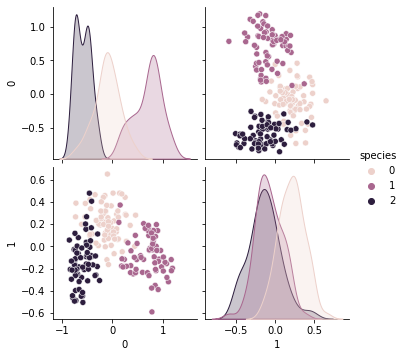

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data_2d, hue='species')
plt.show()

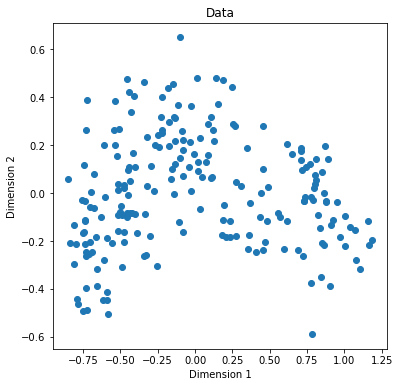

In [36]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
plt.scatter(data_2d[0],data_2d[1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

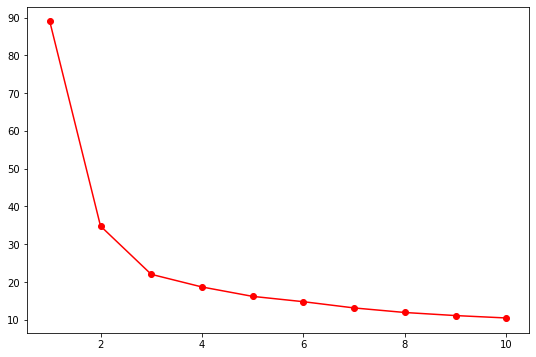

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_features)
    wcss.append(model.inertia_)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(range(1,11), wcss, marker='o', color='red')
plt.show()

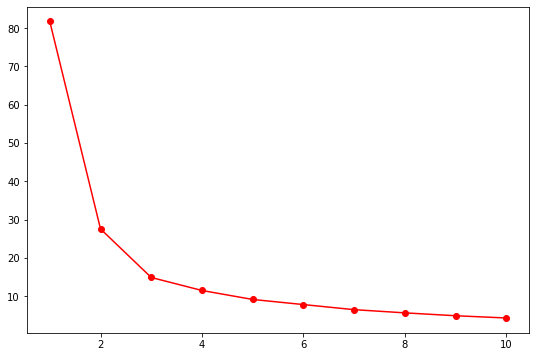

In [39]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(features_2d)
    wcss.append(model.inertia_)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(range(1,11), wcss, marker='o', color='red')
plt.show()

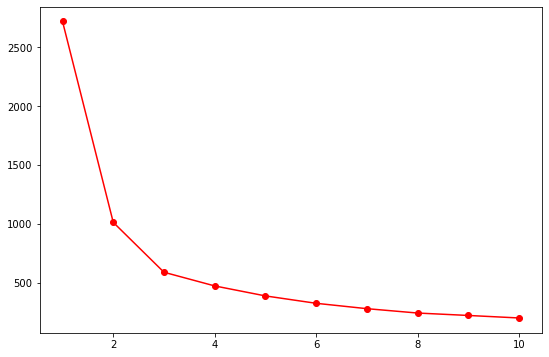

In [40]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(data[features].values)
    wcss.append(model.inertia_)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
ax.plot(range(1,11), wcss, marker='o', color='red')
plt.show()